<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Multi-study-MAGs" data-toc-modified-id="Multi-study-MAGs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multi-study MAGs</a></span><ul class="toc-item"><li><span><a href="#Multi-study-project-list" data-toc-modified-id="Multi-study-project-list-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Multi-study project list</a></span></li><li><span><a href="#Collecting-all-MAGs" data-toc-modified-id="Collecting-all-MAGs-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Collecting all MAGs</a></span><ul class="toc-item"><li><span><a href="#Checkm-info-for-dRep" data-toc-modified-id="Checkm-info-for-dRep-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Checkm info for dRep</a></span></li></ul></li></ul></li><li><span><a href="#Georg-animal-gut-MAGs" data-toc-modified-id="Georg-animal-gut-MAGs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Georg animal gut MAGs</a></span><ul class="toc-item"><li><span><a href="#Collecting-all-MAGs" data-toc-modified-id="Collecting-all-MAGs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Collecting all MAGs</a></span><ul class="toc-item"><li><span><a href="#CheckM-info-for-dRep" data-toc-modified-id="CheckM-info-for-dRep-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>CheckM info for dRep</a></span></li></ul></li></ul></li><li><span><a href="#Merge-datasets" data-toc-modified-id="Merge-datasets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Merge datasets</a></span></li><li><span><a href="#dRep" data-toc-modified-id="dRep-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>dRep</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Adding-info" data-toc-modified-id="Adding-info-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Adding info</a></span><ul class="toc-item"><li><span><a href="#checkM" data-toc-modified-id="checkM-7.1.1.1"><span class="toc-item-num">7.1.1.1&nbsp;&nbsp;</span>checkM</a></span></li><li><span><a href="#gtdbtk" data-toc-modified-id="gtdbtk-7.1.1.2"><span class="toc-item-num">7.1.1.2&nbsp;&nbsp;</span>gtdbtk</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Summary:-all" data-toc-modified-id="Summary:-all-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary: all</a></span><ul class="toc-item"><li><span><a href="#checkM" data-toc-modified-id="checkM-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>checkM</a></span></li><li><span><a href="#GTDBTk" data-toc-modified-id="GTDBTk-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>GTDBTk</a></span><ul class="toc-item"><li><span><a href="#Writing-tables" data-toc-modified-id="Writing-tables-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Writing tables</a></span></li></ul></li></ul></li><li><span><a href="#Summary:-high-quality" data-toc-modified-id="Summary:-high-quality-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary: high quality</a></span><ul class="toc-item"><li><span><a href="#Checkm" data-toc-modified-id="Checkm-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Checkm</a></span></li><li><span><a href="#GTDBTk" data-toc-modified-id="GTDBTk-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>GTDBTk</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* dreplicate all MAGs

# Var

In [1]:
# Multi-Study info
MS_work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/',
                         'metagenome/multi-study/BioProjects/summary/LLMGA/')
MS_tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/'

# Georg Animal gut wOutVertebrata per-host-class assemblies
GA_work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/',
                     'HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_summary/')
GA_tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'

# workdir
work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/',
                      'metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal')
MAG_dir = file.path(work_dir, 'MAGs')

# params
threads = 30
ani = 0.999
conda_env = 'metacompass'

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(doParallel)

library(future)
library(future.batchtools)
library(future.apply)
options(future.wait.interval = 2.0)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [3]:
make_dir(work_dir)
make_dir(MAG_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs 


# Multi-study MAGs

## Multi-study project list

In [5]:
MS_projects = dir(MS_tmp_out_dir, 'PR*', full.names = TRUE) %>% sapply(basename) %>% as.vector
MS_projects %>% length %>% print
MS_projects

[1] 13


[1] "PRJEB11755"              "PRJEB20308"             
 [3] "PRJEB22765"              "PRJEB23642"             
 [5] "PRJEB29346"              "PRJEB9357"              
 [7] "PRJNA316560-PRJNA316570" "PRJNA336354"            
 [9] "PRJNA381379"             "PRJNA417359"            
[11] "PRJNA476660"             "PRJNA485217"            
[13] "PRJNA532626"

## Collecting all MAGs

* combining all MAGs in 1 directory; renaming as needed
* all MAGs generated

In [6]:
# MAGs selected by DAS-tool 
das_tool_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
    
    dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
    dastool$projectID = projectID
    return(dastool)
}

# loading all post das-tool files
MS_dastool = MS_projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .)
MS_dastool %>% dfhead

[1] 8488    3


binID,fasta,projectID
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755
SAMEA3663006__metabat2_high_PE.015.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__metabat2_high_PE.015.contigs.fa,PRJEB11755


In [7]:
# checking for unique naming 
MS_dastool$binID %>% length %>% print
MS_dastool$binID %>% unique %>% length %>% print

[1] 8488
[1] 8488


In [8]:
# copying MAGs
MS_dastool = MS_dastool %>%
    mutate(out_file = gsub('.+/', paste0(MAG_dir, '/'), fasta)) 
MS_dastool %>% dfhead

[1] 8488    4


binID,fasta,projectID,out_file
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663006__maxbin2_high_prob.014.contigs.fa
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663006__maxbin2_low_prob.005.contigs.fa
SAMEA3663006__metabat2_high_PE.015.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__metabat2_high_PE.015.contigs.fa,PRJEB11755,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663006__metabat2_high_PE.015.contigs.fa


In [9]:
# copying MAGs
cp_files = function(src, dst){
    if(!file.exists(as.character(dst))){
        file.copy(as.character(src), as.character(dst))
    }
}

res = mapply(cp_files, MS_dastool$fasta, MS_dastool$out_file)

In [10]:
# checking number of fasta files copied
F = list.files(MAG_dir) 
F = F[grepl('.fa$', F)]
F %>% length %>% print

[1] 8930


### Checkm info for dRep

In [11]:
checkm_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
    
    markers_sum = read.delim(checkm_markers_file, sep='\t')

    markers_sum$projectID = projectID
    return(markers_sum)
}

# checkm info
MS_markers_sum = MS_projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    inner_join(MS_dastool, c('Bin.Id'='binID', 'projectID'='projectID'))
MS_markers_sum %>% dfhead

[1] 8488   32


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,out_file
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.20,36.36,2021688,0,⋯,2269,134,342,11,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.001.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.001.contigs.fa
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.00,0.00,559857,0,⋯,736,136,87,0,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.002.contigs.fa
SAMEA3663136__maxbin2_low_prob.008.contigs,o__Bacteroidales (UID2617),213,406,265,80.57,0.89,60.00,2026627,0,⋯,2016,64,337,5,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.008.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.008.contigs.fa


In [12]:
# summary
MS_markers_sum$Completeness %>% summary %>% print
MS_markers_sum$Contamination %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.52   70.05   88.75   80.12   96.13  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.430   1.100   2.373   2.100 111.520 


In [13]:
# writing table of checkm info for dRep
MS_markers_sum_f = MS_markers_sum %>%
    dplyr::select(out_file, Completeness, Contamination) %>%
    mutate(out_file = gsub('\\/+', '\\/', out_file)) %>%
    rename('genome' = out_file,
           'completeness' = Completeness,
           'contamination' = Contamination) %>%
    mutate(completeness = completeness %>% as.character %>% as.numeric,
           completeness = ifelse(is.na(completeness), 0, completeness),
           contamination = contamination %>% as.character %>% as.numeric,
           contamination = ifelse(is.na(contamination), 0, contamination))

MS_checkm_info_F = file.path(MAG_dir, 'checkm_info.tsv')
MS_markers_sum_f %>%
    write.table(file=MS_checkm_info_F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', MS_checkm_info_F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/checkm_info.tsv 


# Georg animal gut MAGs

In [14]:
GA_projects = c(
'MG_assembly_act',
'MG_assembly_amp',
'MG_assembly_ave',
'MG_assembly_mam',
'MG_assembly_rep'
)

## Collecting all MAGs

In [15]:
# loading all post das-tool files
GA_dastool = GA_projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .)
GA_dastool %>% dfhead

[1] 442   3


binID,fasta,projectID
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X250_Common_Nase__maxbin2_low_prob.002.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X250_Common_Nase__maxbin2_low_prob.002.contigs.fa,MG_assembly_act


In [16]:
# checking for unique naming 
GA_dastool$binID %>% length %>% print
GA_dastool$binID %>% unique %>% length %>% print

[1] 442
[1] 442


In [17]:
# copying MAGs
GA_dastool = GA_dastool %>%
    mutate(out_file = gsub('.+/', paste0(MAG_dir, '/'), fasta)) 
res = mapply(cp_files, GA_dastool$fasta, GA_dastool$out_file)

In [18]:
# checking number of fasta files copied
F = list.files(MAG_dir) 
F = F[grepl('.fa$', F)]
F %>% length %>% print

[1] 8930


### CheckM info for dRep

In [19]:
# checkm info
GA_markers_sum = GA_projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    inner_join(GA_dastool, c('Bin.Id'='binID', 'projectID'='projectID'))
GA_markers_sum %>% dfhead

[1] 442  32


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,out_file
X329_Bleak__maxbin2_high_prob.001.contigs,c__Gammaproteobacteria (UID4754),541,304,171,72.51,8.96,74.07,3158255,0,⋯,3342,69,208,27,0,0,0,MG_assembly_act,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X329_Bleak__maxbin2_high_prob.001.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/X329_Bleak__maxbin2_high_prob.001.contigs.fa
X329_Bleak__maxbin2_high_prob.002.contigs,k__Bacteria (UID2329),174,149,89,77.23,6.23,88.89,1763352,0,⋯,1851,27,113,9,0,0,0,MG_assembly_act,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X329_Bleak__maxbin2_high_prob.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/X329_Bleak__maxbin2_high_prob.002.contigs.fa
X329_Bleak__maxbin2_low_prob.003.contigs,f__Enterobacteriaceae (UID5124),134,1173,336,7.70,0.42,0.00,773354,0,⋯,901,1019,147,7,0,0,0,MG_assembly_act,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X329_Bleak__maxbin2_low_prob.003.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/X329_Bleak__maxbin2_low_prob.003.contigs.fa


In [20]:
# summary
GA_markers_sum$Completeness %>% summary %>% print
GA_markers_sum$Contamination %>% summary %>% print

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.61   57.84   84.69   73.84   94.27  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3825  1.1900  3.9412  2.5775 84.5900 


In [21]:
# writing table of checkm info for dRep
GA_markers_sum_f = GA_markers_sum %>%
    dplyr::select(out_file, Completeness, Contamination) %>%
    mutate(out_file = gsub('\\/+', '\\/', out_file)) %>%
    rename('genome' = out_file,
           'completeness' = Completeness,
           'contamination' = Contamination) %>%
    mutate(completeness = completeness %>% as.character %>% as.numeric,
           completeness = ifelse(is.na(completeness), 0, completeness),
           contamination = contamination %>% as.character %>% as.numeric,
           contamination = ifelse(is.na(contamination), 0, contamination))

GA_checkm_info_F = file.path(MAG_dir, 'checkm_info.tsv')
GA_markers_sum_f %>%
   write.table(file=GA_checkm_info_F, sep='\t', quote=FALSE, 
               row.names=FALSE, col.names=FALSE, append = TRUE)
cat('File written:', GA_checkm_info_F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/checkm_info.tsv 


# Merge datasets

In [22]:
markers_sum = rbind(MS_markers_sum, GA_markers_sum)
markers_sum %>% dfhead

[1] 8930   32


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,out_file
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.20,36.36,2021688,0,⋯,2269,134,342,11,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.001.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.001.contigs.fa
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.00,0.00,559857,0,⋯,736,136,87,0,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.002.contigs.fa
SAMEA3663136__maxbin2_low_prob.008.contigs,o__Bacteroidales (UID2617),213,406,265,80.57,0.89,60.00,2026627,0,⋯,2016,64,337,5,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.008.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/SAMEA3663136__maxbin2_low_prob.008.contigs.fa


In [23]:
# refactoring
checkm_info_F = GA_checkm_info_F

# dRep

In [24]:
# output directory (deletes if exists)
drep_outdir = file.path(work_dir, glue::glue('drep-{ANI}', ANI=ani))
#unlink(drep_outdir, recursive = TRUE)
make_dir(drep_outdir)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999 


In [25]:
# data_tables directory (for Bdb.csv)
drep_dt_outdir = file.path(drep_outdir, 'data_tables')
make_dir(drep_dt_outdir)

Created directory: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/data_tables 


In [26]:
# creating a file with genome info for dRep
bdb_F = file.path(drep_dt_outdir, 'Bdb.csv')
markers_sum %>%
    mutate(genome = basename(out_file)) %>%
    rename('location' = out_file,
           'length' = Genome.size..bp.) %>%
    dplyr::select(genome, location, length) %>%
    write.table(file=bdb_F, sep=',', quote=FALSE, row.names=FALSE)
cat('File written:', bdb_F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/data_tables/Bdb.csv 


In [27]:
# dRep cmd
cmd = 'dRep dereplicate -comp 50 -con 5 -sa {ani} -p {threads} --genomeInfo {checkm_info} {outdir}'
cmd = glue::glue(cmd, threads=threads, ani=ani, checkm_info=checkm_info_F, outdir=drep_outdir)
cmd

dRep dereplicate -comp 50 -con 5 -sa 0.999 -p 30 --genomeInfo /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/checkm_info.tsv /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999

In [28]:
# local run (relatively short job due to providing checkm info)
## WARNING: SLOW
bash_job(cmd, conda_env=conda_env)

***************************************************
    ..:: dRep dereplicate Step 1. Filter ::..
***************************************************
    
Will filter Bdb
Calculating genome info of genomes
99.99% of genomes passed length filtering
Provided genome info has full genome path- correcting
81.12% of genomes passed checkM filtering
***************************************************
    ..:: dRep dereplicate Step 2. Cluster ::..
***************************************************
    
Clustering Step 1. Parse Arguments
Clustering Step 2. Perform MASH (primary) clustering
2a. Run pair-wise MASH clustering
2b. Cluster pair-wise MASH clustering
1464 primary clusters made
Step 3. Perform secondary clustering
Running 225139 ANImf comparisons- should take ~ 3752.3 min
Step 4. Return output
***************************************************
    ..:: dRep dereplicate Step 3. Choose ::..
***************************************************
    
Loading work directory
Provided genome i

## Results

In [30]:
# number of dereplicated genomes
drep_fna_files = list.files(file.path(drep_outdir, 'dereplicated_genomes'), '*.fa', full.names=TRUE)
cat('Number of de-replicated genomes:', drep_fna_files %>% length, '\n')

Number of de-replicated genomes: 5596 


In [31]:
# dataframe of selected genomes
drep_res = data.frame(binID = gsub('\\.fa$', '', basename(drep_fna_files)),
                      fasta = drep_fna_files)

drep_res %>% dfhead

[1] 5596    2


binID,fasta
artificially_reared_1__metabat2_low_PE.001.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa
artificially_reared_1__metabat2_low_PE.008.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.008.contigs.fa


### Adding info

#### checkM

In [32]:
# adding checkm info
drep_res_j = drep_res %>%
    inner_join(markers_sum, c('binID'='Bin.Id'))

drep_res_j %>% dfhead

Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 5596   33


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta.y,out_file
artificially_reared_1__metabat2_low_PE.001.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,o__Bacteroidales (UID2657),160,491,268,87.24,4.15,45.00,2455242,⋯,2295,60,411,20,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_1__metabat2_low_PE.001.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/artificially_reared_1__metabat2_low_PE.001.contigs.fa
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,2909,39,438,14,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_1__metabat2_low_PE.002.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/artificially_reared_1__metabat2_low_PE.002.contigs.fa
artificially_reared_1__metabat2_low_PE.008.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.008.contigs.fa,o__Lactobacillales (UID543),294,472,265,97.74,1.73,33.33,2072345,⋯,2033,12,454,6,0,0,0,PRJNA316560-PRJNA316570,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA316560-PRJNA316570/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/artificially_reared_1__metabat2_low_PE.008.contigs.fa,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs/artificially_reared_1__metabat2_low_PE.008.contigs.fa


#### gtdbtk

In [33]:
gtdbtk_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
    gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

    ## bacteria
    gtdb = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
        dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
        separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
    ## archaea
    if(file.size(gtdbtk_arc_sum_file) > 0){
        X = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
        colnames(X) = gtdbtk_bac_sum_file %>% read.delim(sep='\t') %>% colnames
        X = X %>%
            dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
            separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
        gtdb = rbind(gtdb,X)
    }
    gtdb$projectID = projectID
    return(gtdb)
}

# gtdb info
tmp1 = MS_projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .)

tmp2 = GA_projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .)

gtdb = rbind(tmp1, tmp2)
tmp1 = tmp2 = NULL

gtdb %>% dfhead

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.912633214467, 0.908236779677, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.949860619467, 0.854655634167, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(80.38, 98.28)):
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.987172349716, 0.94327894093, :
“invalid factor level, NA generated”

[1] 8932   25


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID
SAMEA3663177__metabat2_low_PE.009.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp000834015,GCF_000834015.1,95.0,⋯,99.21,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,89.25,11,N/A,N/A,PRJEB11755
SAMEA3663136__metabat2_low_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__Phascolarctobacterium_A,s__Phascolarctobacterium_A succinatutens,GCF_000188175.1,95.0,⋯,99.52,1.0,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,63.73,11,N/A,N/A,PRJEB11755
SAMEA3663177__metabat2_high_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Veillonellales,f__Dialisteraceae,g__Dialister,s__Dialister sp000434475,GCA_000434475.1,95.0,⋯,96.55,0.96,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Dialisteraceae;g__Dialister;s__,ANI/Placement,topological placement and ANI have congruent species assignments,53.21,11,N/A,N/A,PRJEB11755


In [34]:
# adding checkm info
drep_res_j = drep_res_j %>%
    inner_join(gtdb, c('binID'='user_genome', 'projectID'='projectID'))

drep_res_j %>% dfhead

Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 5596   56


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
artificially_reared_1__metabat2_low_PE.001.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.001.contigs.fa,o__Bacteroidales (UID2657),160,491,268,87.24,4.15,45.00,2455242,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A plebeius,94.69,0.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,ANI,topological placement and ANI have incongruent species assignments,80.2,11,N/A,N/A
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially_reared_1__metabat2_low_PE.008.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.008.contigs.fa,o__Lactobacillales (UID543),294,472,265,97.74,1.73,33.33,2072345,⋯,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__Lactococcus piscium_C,98.68,0.97,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__,ANI/Placement,topological placement and ANI have congruent species assignments,97.92,11,N/A,N/A


# Summary: all

## checkM

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.08   76.84   89.88   84.94   95.89  100.00 
[1] 13.44705
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.570   1.130   1.362   2.000   5.000 
[1] 1.091929
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/57225d091de4c65de6c2e00ec831cb93.RDS 


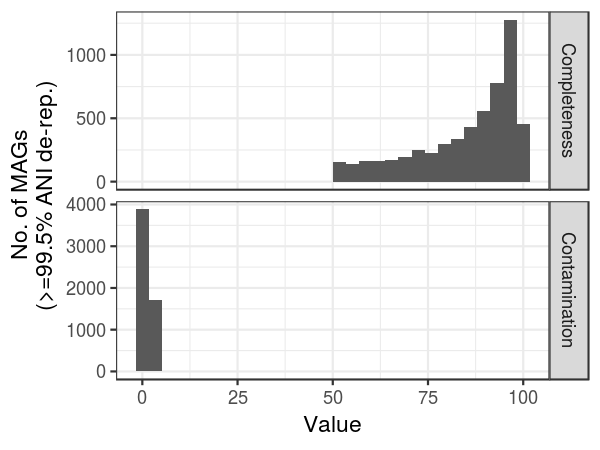

In [37]:
# checkm stats
drep_res_j$Completeness %>% summary %>% print
drep_res_j$Completeness %>% sd %>% print
drep_res_j$Contamination %>% summary %>% print
drep_res_j$Contamination %>% sd %>% print

p = drep_res_j %>%
    dplyr::select(binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99.5% ANI de-rep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() 

dims(4,3)
Plot(p)

In [36]:
cat('Number of "high quality" genomes:', 
    drep_res_j %>% filter(Completeness >= 90) %>% nrow, '\n')

Number of "high quality" genomes: 2773 


## GTDBTk

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/2b003d85a019470e32ae430a58bdb970.RDS 


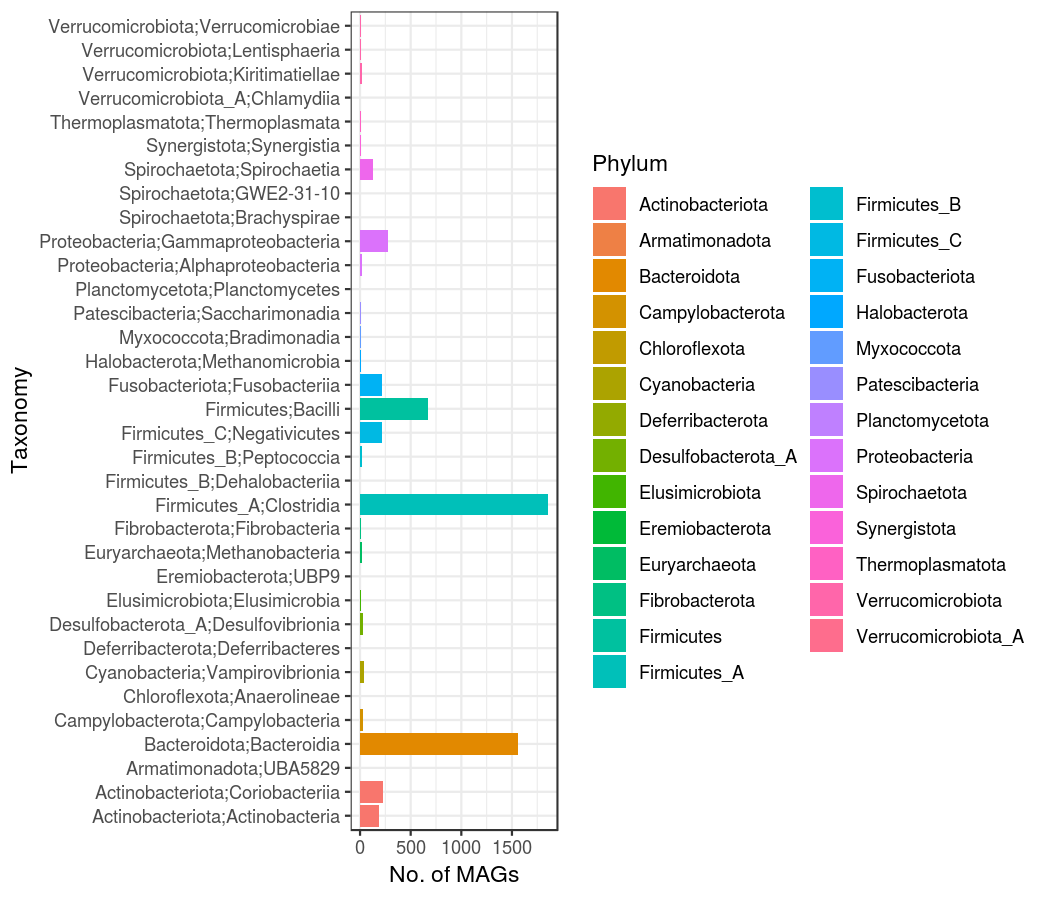

In [39]:
# Total by class
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() 

dims(7,6)
Plot(p)

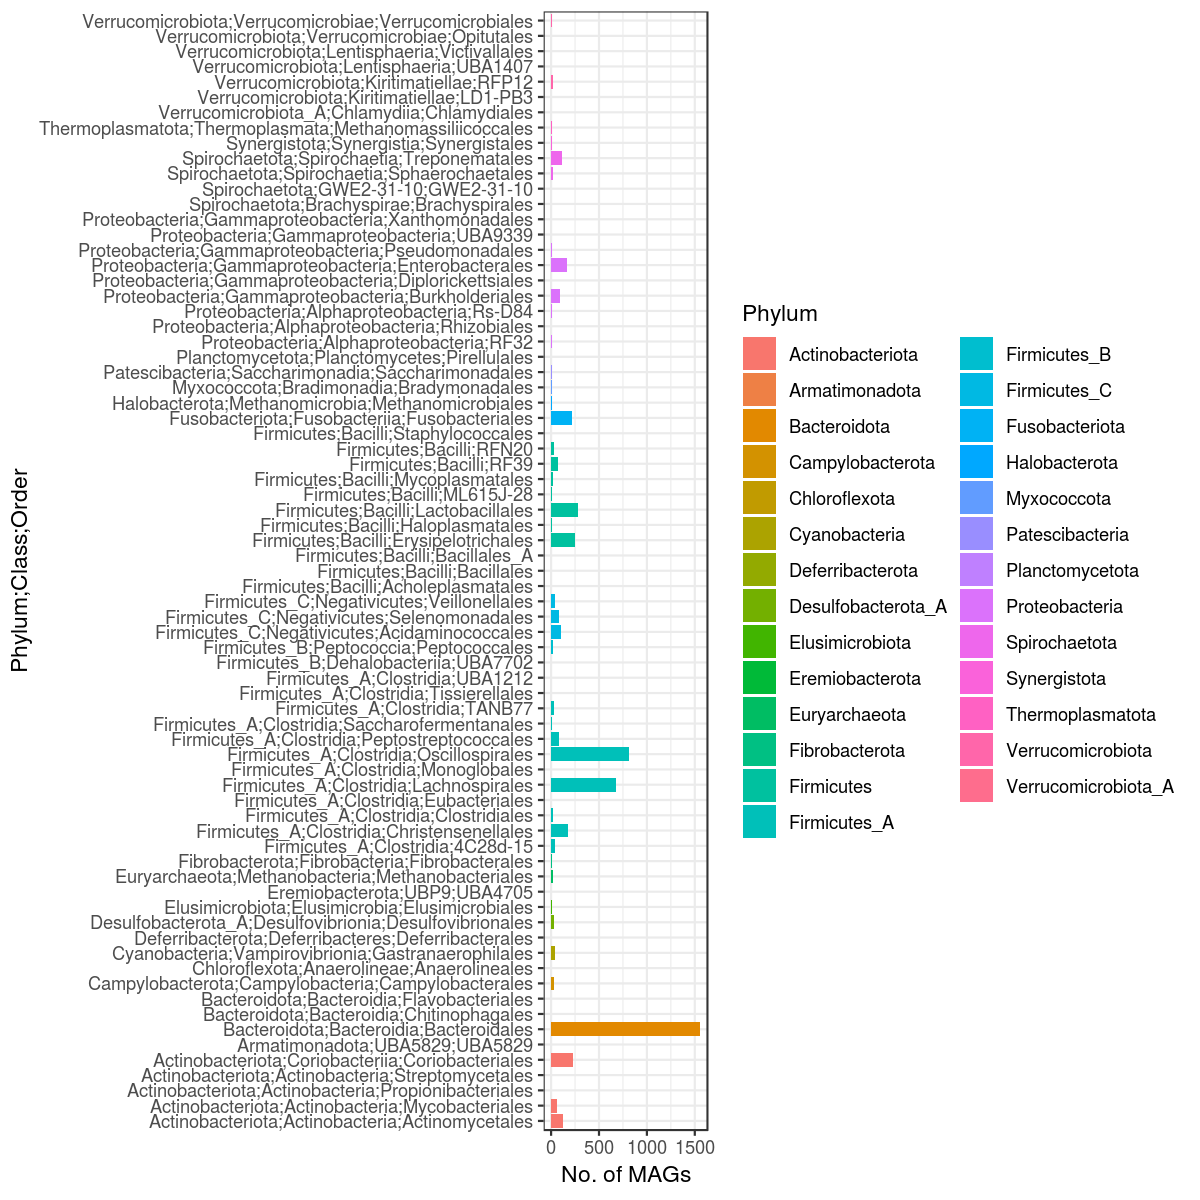

In [41]:
# Total by order
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Phylum;Class;Order', 
         y='No. of MAGs') +
    theme_bw() 

dims(8,8)
plot(p)

In [42]:
# Christ. genomes
drep_res_j %>%
    filter(Order == 'o__Christensenellales') %>%
    nrow %>% print
# Methanogen genomes
drep_res_j %>%
    filter(Domain == 'd__Archaea',
           grepl('^c__Methano', Class)) %>%
    nrow %>% print

[1] 172
[1] 25


Number of MAGs with closests match ANI of <95%: 3595 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/bf8793b570fa61b3d05a525f39178952.RDS 


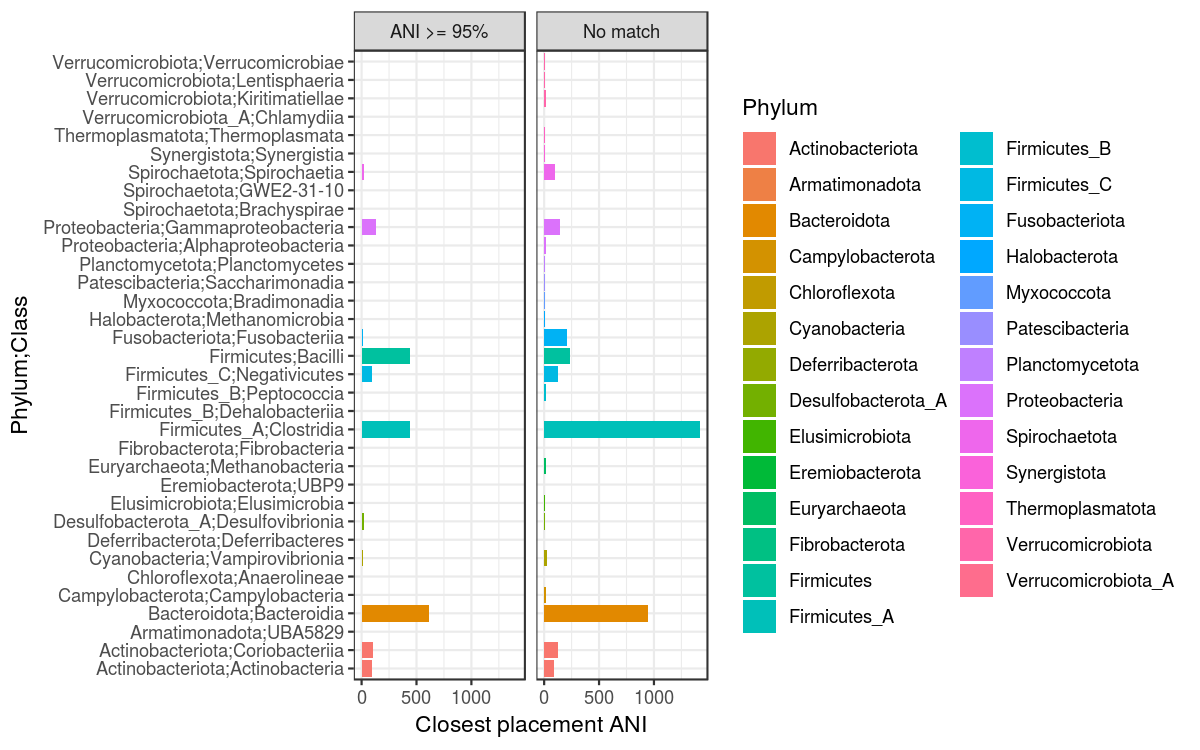

In [44]:
# no close ANI matches 
drep_res_j_s = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) 

cat('Number of MAGs with closests match ANI of <95%:',
    drep_res_j_s %>% filter(closest_placement_ani < 95) %>% nrow, '\n')

p = drep_res_j_s %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(x='Phylum;Class', y='Closest placement ANI') +
    theme_bw() 

dims(8,5)
Plot(p)

Number of genomes lacking a genus-level classification: 539 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/6e61ce83f88ac4125bac2dbf3c04bcc7.RDS 


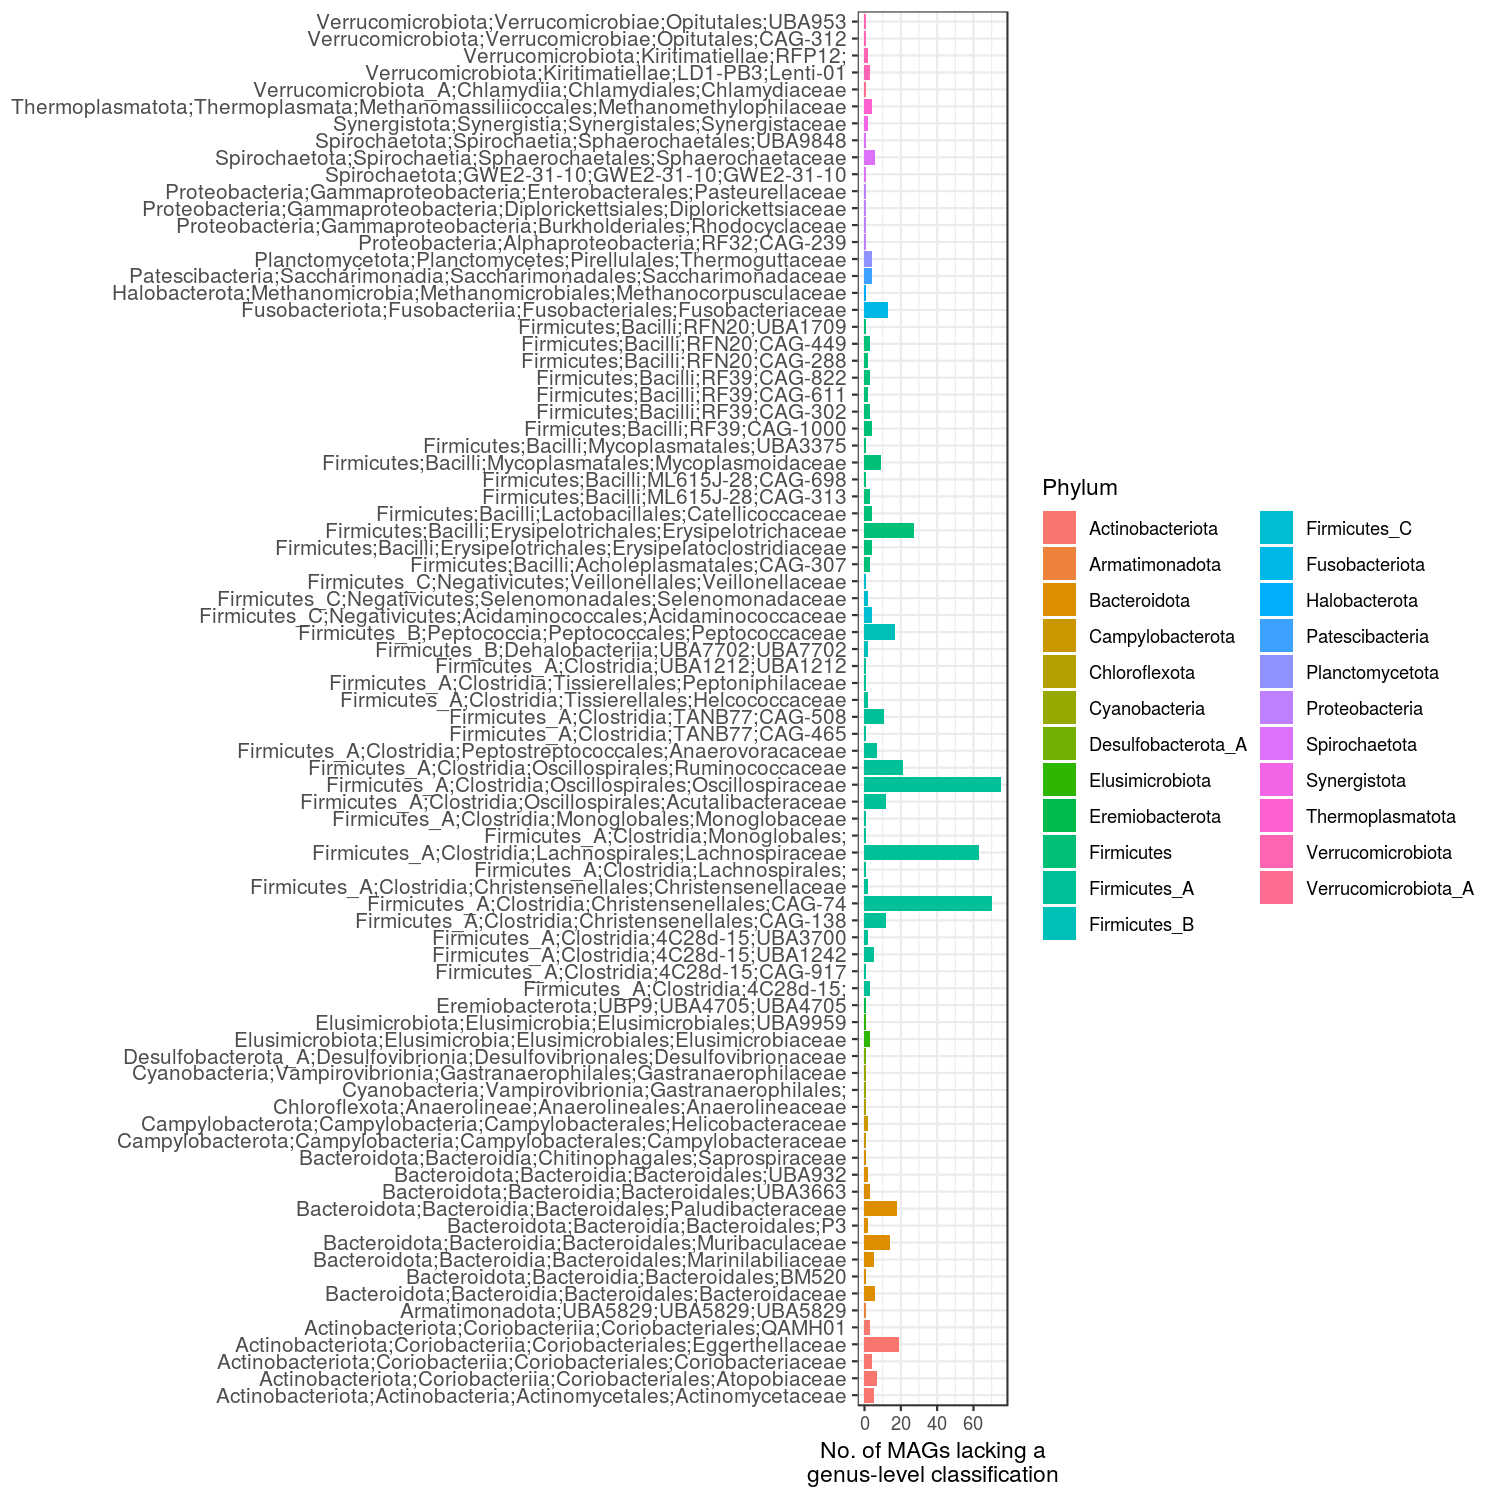

In [45]:
# lacking a genus-level classification
drep_j_s = drep_res_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a genus-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(10,10)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/229e4888a2beec03beb81c98e73559a9.RDS 


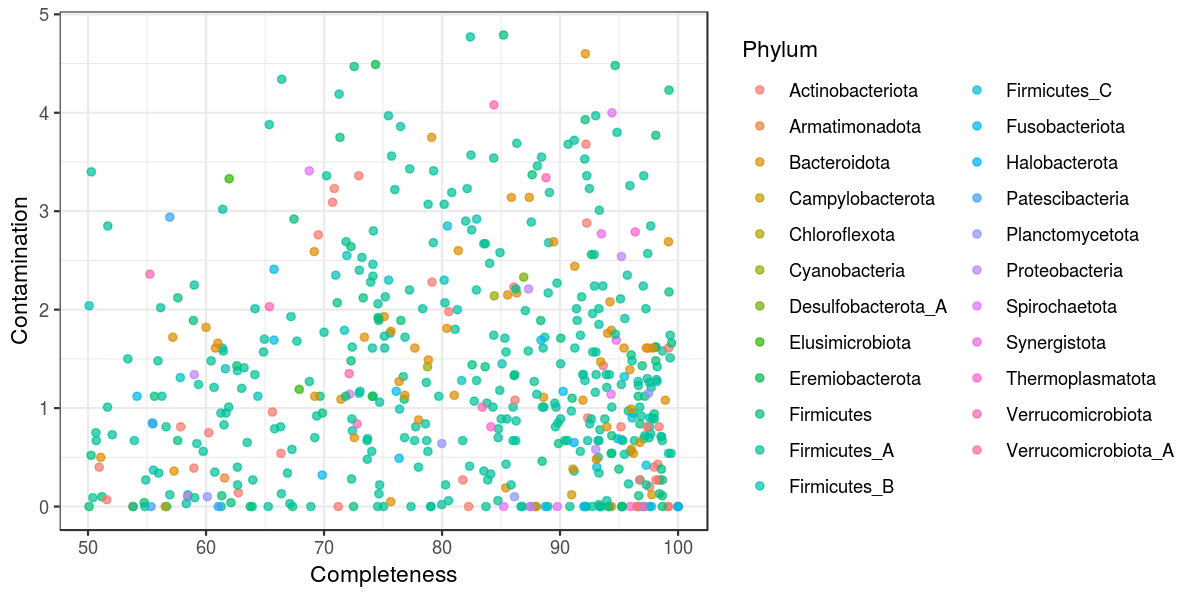

In [46]:
# checkm stats for MAGs lacking a genus representative
drep_j_s = drep_res_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum)) 

p = drep_j_s %>%
    ggplot(aes(Completeness, Contamination, color=Phylum)) +
    geom_point(alpha=0.7) +
    theme_bw()

dims(8,4)
Plot(p)

Number of genomes lacking a family-level classification: 8 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/9f6fe373f18cd294fbc9e45f302983dd.RDS 


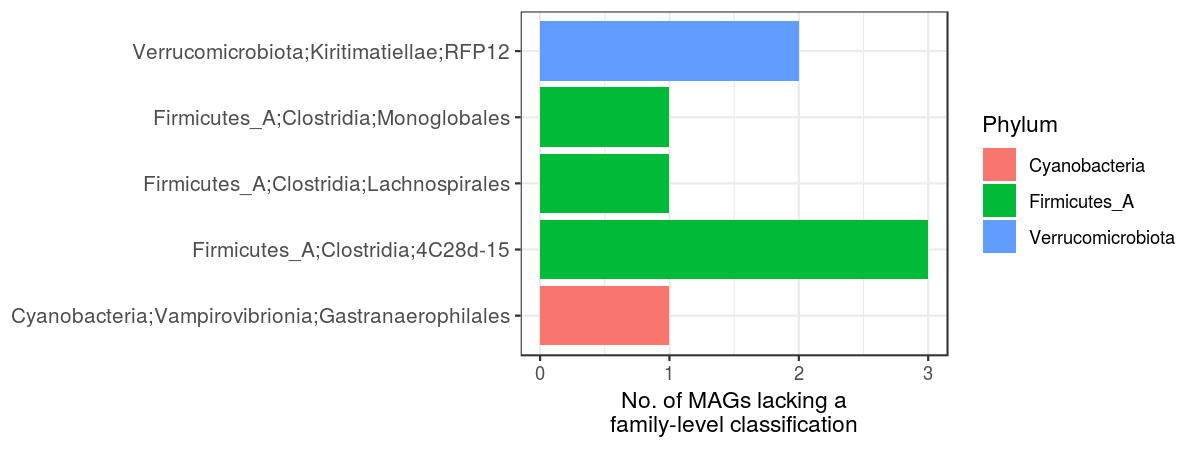

In [47]:
drep_j_s = drep_res_j %>%
    filter(Family == 'f__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order,  sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a family-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\nfamily-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(8,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/f52d64c7bac685ec29e88f18c17a8506.RDS 


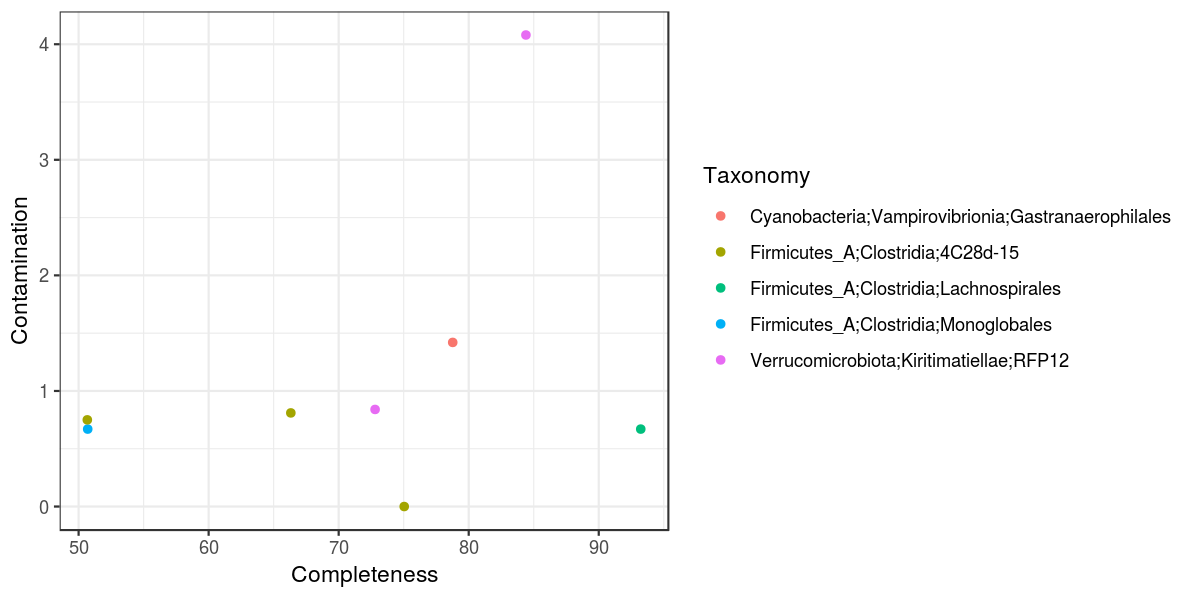

In [49]:
# checkm stats for MAGs lacking a family representative
drep_j_s = drep_res_j %>%
    filter(Family == 'f__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order,  sep=';', remove=FALSE) 

p = drep_j_s %>%
    ggplot(aes(Completeness, Contamination, color=Taxonomy)) +
    geom_point() +
    theme_bw()

dims(8,4)
Plot(p)

### Writing tables

In [50]:
F = file.path(drep_outdir, 'drep-MAG_metadata.tsv')
drep_res_j %>%
    write.table(file=F, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/drep-MAG_metadata.tsv 


# Summary: high quality

In [51]:
# filter
drep_res_j = drep_res_j %>% filter(Completeness >= 90)
drep_res_j %>% dfhead

[1] 2773   56


binID,fasta.x,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
artificially_reared_1__metabat2_low_PE.002.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.002.contigs.fa,o__Bacteroidales (UID2657),160,491,268,92.92,3.00,28.57,3388189,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,85.72,0.61,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,93.33,11,0.985595897806,N/A
artificially_reared_1__metabat2_low_PE.008.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_1__metabat2_low_PE.008.contigs.fa,o__Lactobacillales (UID543),294,472,265,97.74,1.73,33.33,2072345,⋯,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__Lactococcus piscium_C,98.68,0.97,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__,ANI/Placement,topological placement and ANI have congruent species assignments,97.92,11,N/A,N/A
artificially_reared_2__metabat2_high_PE.035.contigs,/ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/drep-0.999/dereplicated_genomes/artificially_reared_2__metabat2_high_PE.035.contigs.fa,o__Bacteroidales (UID2657),160,491,268,97.45,0.62,66.67,3857403,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A sp900066445,80.56,0.32,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__,Placement,taxonomic classification fully defined by topology,95.99,11,0.969620821863,N/A


## Checkm

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  90.00   93.36   95.92   95.53   97.67  100.00 
[1] 2.682479
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.400   0.940   1.194   1.690   5.000 
[1] 1.039209
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/0f0b8ff4fb1798dc6d418b68d504cfc7.RDS 


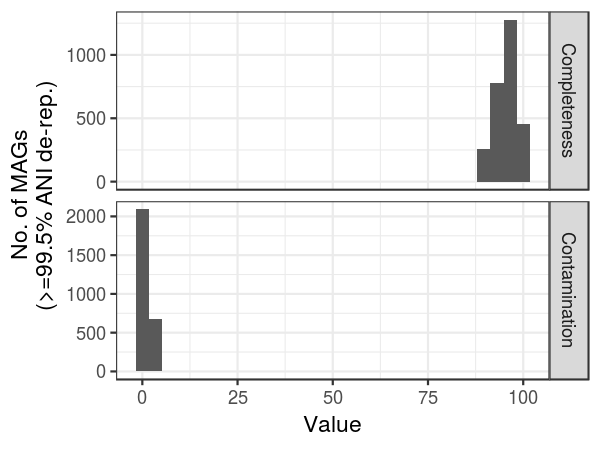

In [52]:
# checkm stats
drep_res_j$Completeness %>% summary %>% print
drep_res_j$Completeness %>% sd %>% print
drep_res_j$Contamination %>% summary %>% print
drep_res_j$Contamination %>% sd %>% print

p = drep_res_j %>%
    dplyr::select(binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99.5% ANI de-rep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() 

dims(4,3)
Plot(p)

## GTDBTk

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/0124dd8c27ccf36f36e515ad7534bb62.RDS 


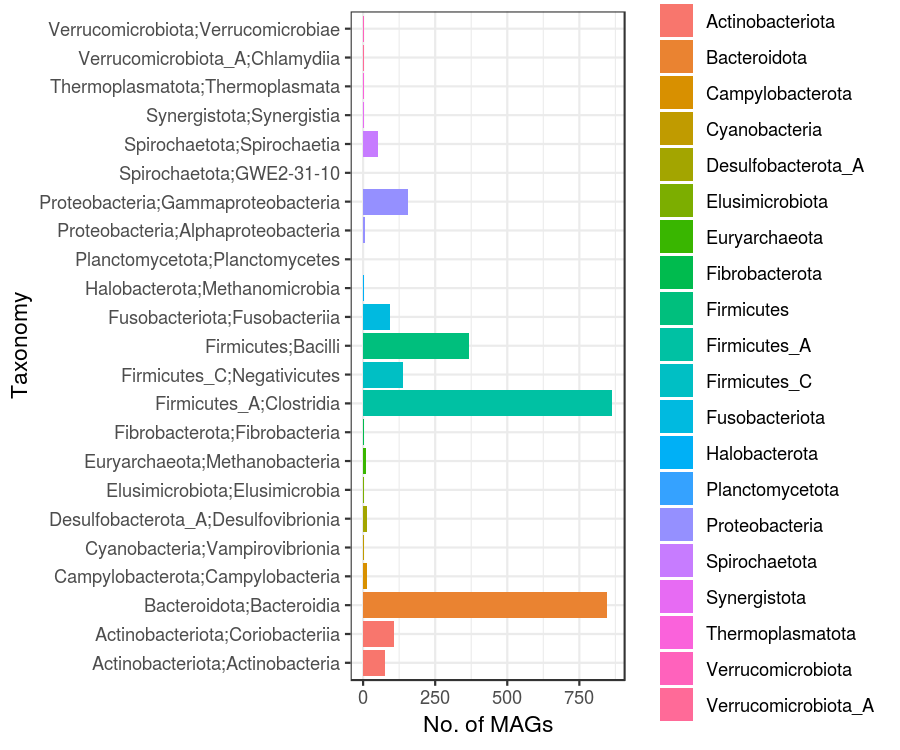

In [53]:
# Total by class
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() 

dims(6,5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/634ab68aceecab44cc756a6976c152e6.RDS 


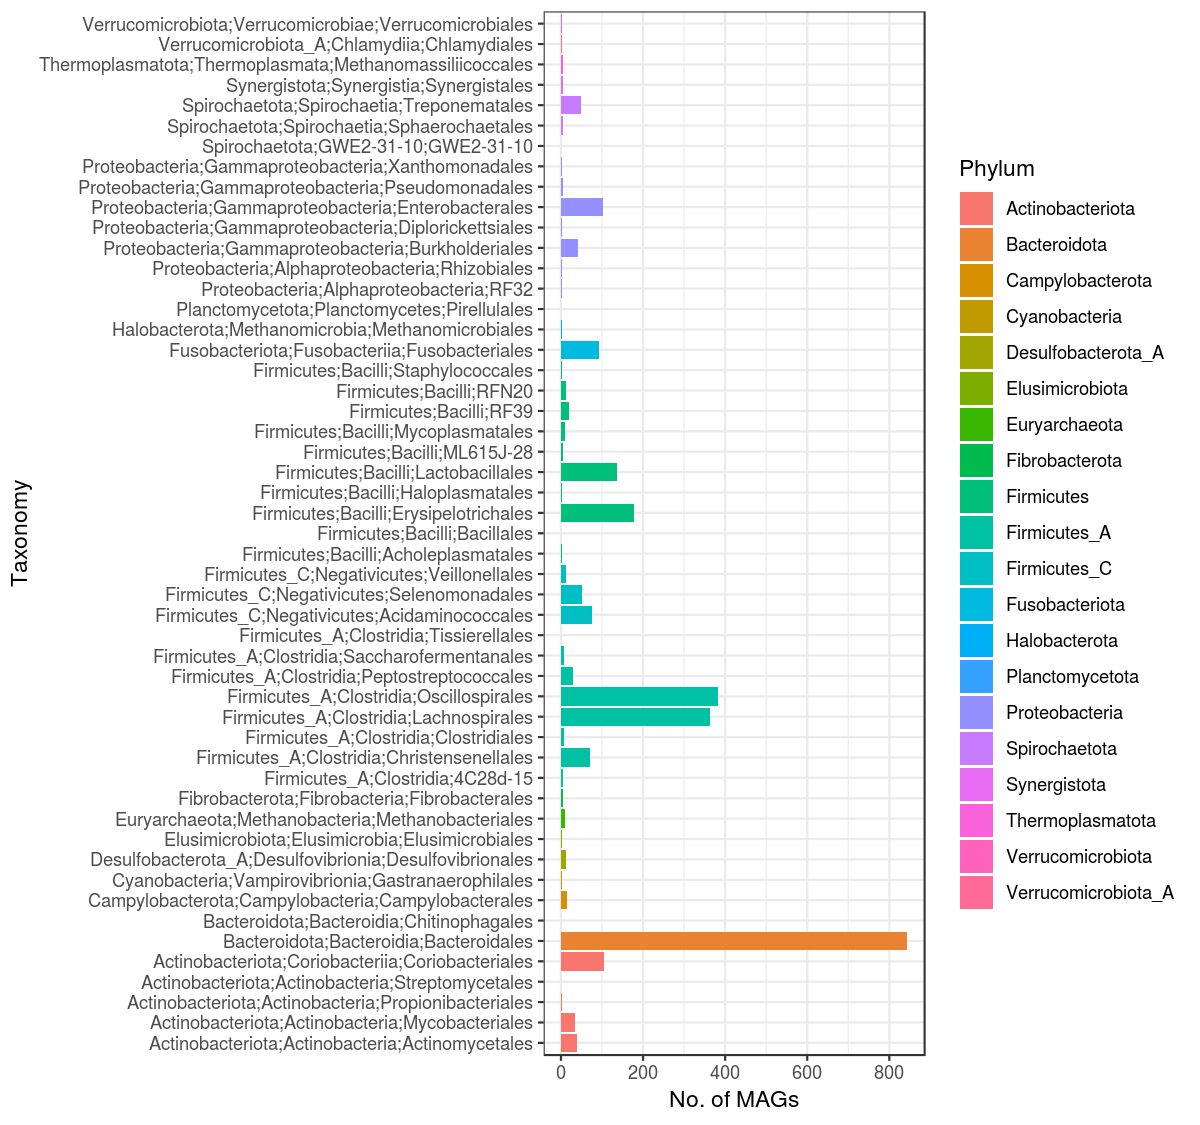

In [54]:
# Total by order
p = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs') +
    theme_bw() 

dims(8,7.5)
Plot(p)

In [55]:
# Christ. genomes
drep_res_j %>%
    filter(Order == 'o__Christensenellales') %>%
    nrow %>% print
# Methanogen genomes
drep_res_j %>%
    filter(Domain == 'd__Archaea',
           grepl('^c__Methano', Class)) %>%
    nrow %>% print

[1] 70
[1] 14


Number of MAGs with closests match ANI of <95%: 1651 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/56d419aafecd1c546639c5b0241e2c3a.RDS 


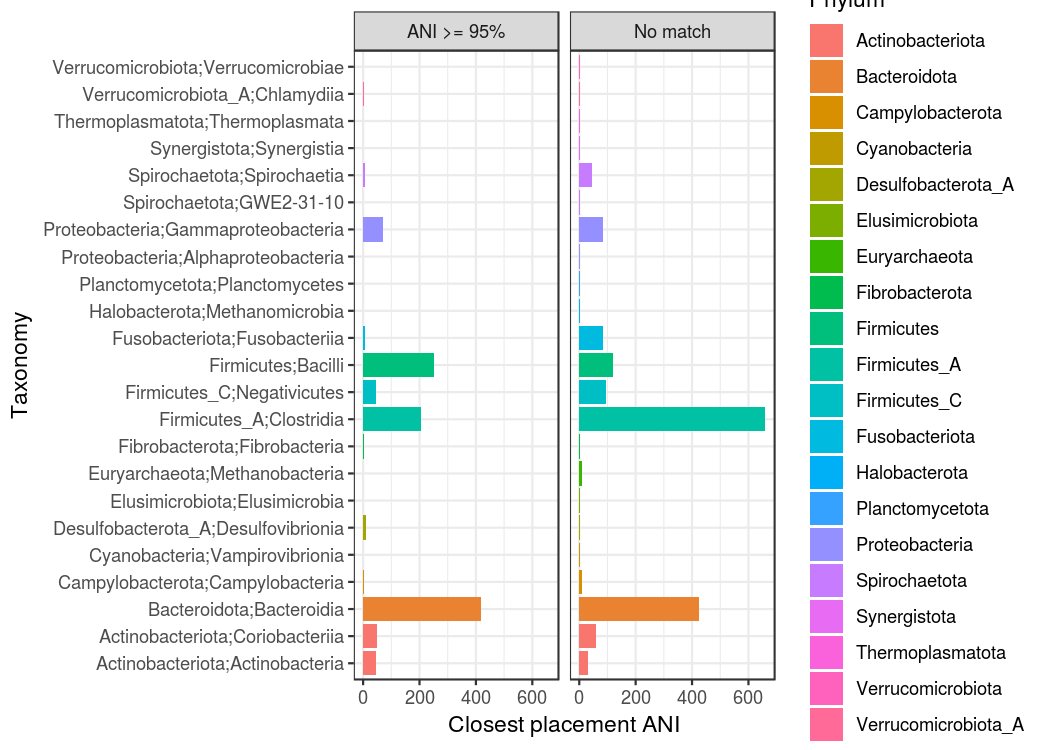

In [56]:
# no close ANI matches 
drep_res_j_s = drep_res_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) 

cat('Number of MAGs with closests match ANI of <95%:',
    drep_res_j_s %>% filter(closest_placement_ani < 95) %>% nrow, '\n')

p = drep_res_j_s %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(7,5)
Plot(p)

Number of genomes lacking a genus-level classification: 204 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/multi-study/07a_drep99p9_wGeorgAnimal/.figures/0c90e1066e82549cc3c6c1d0c561497d.RDS 


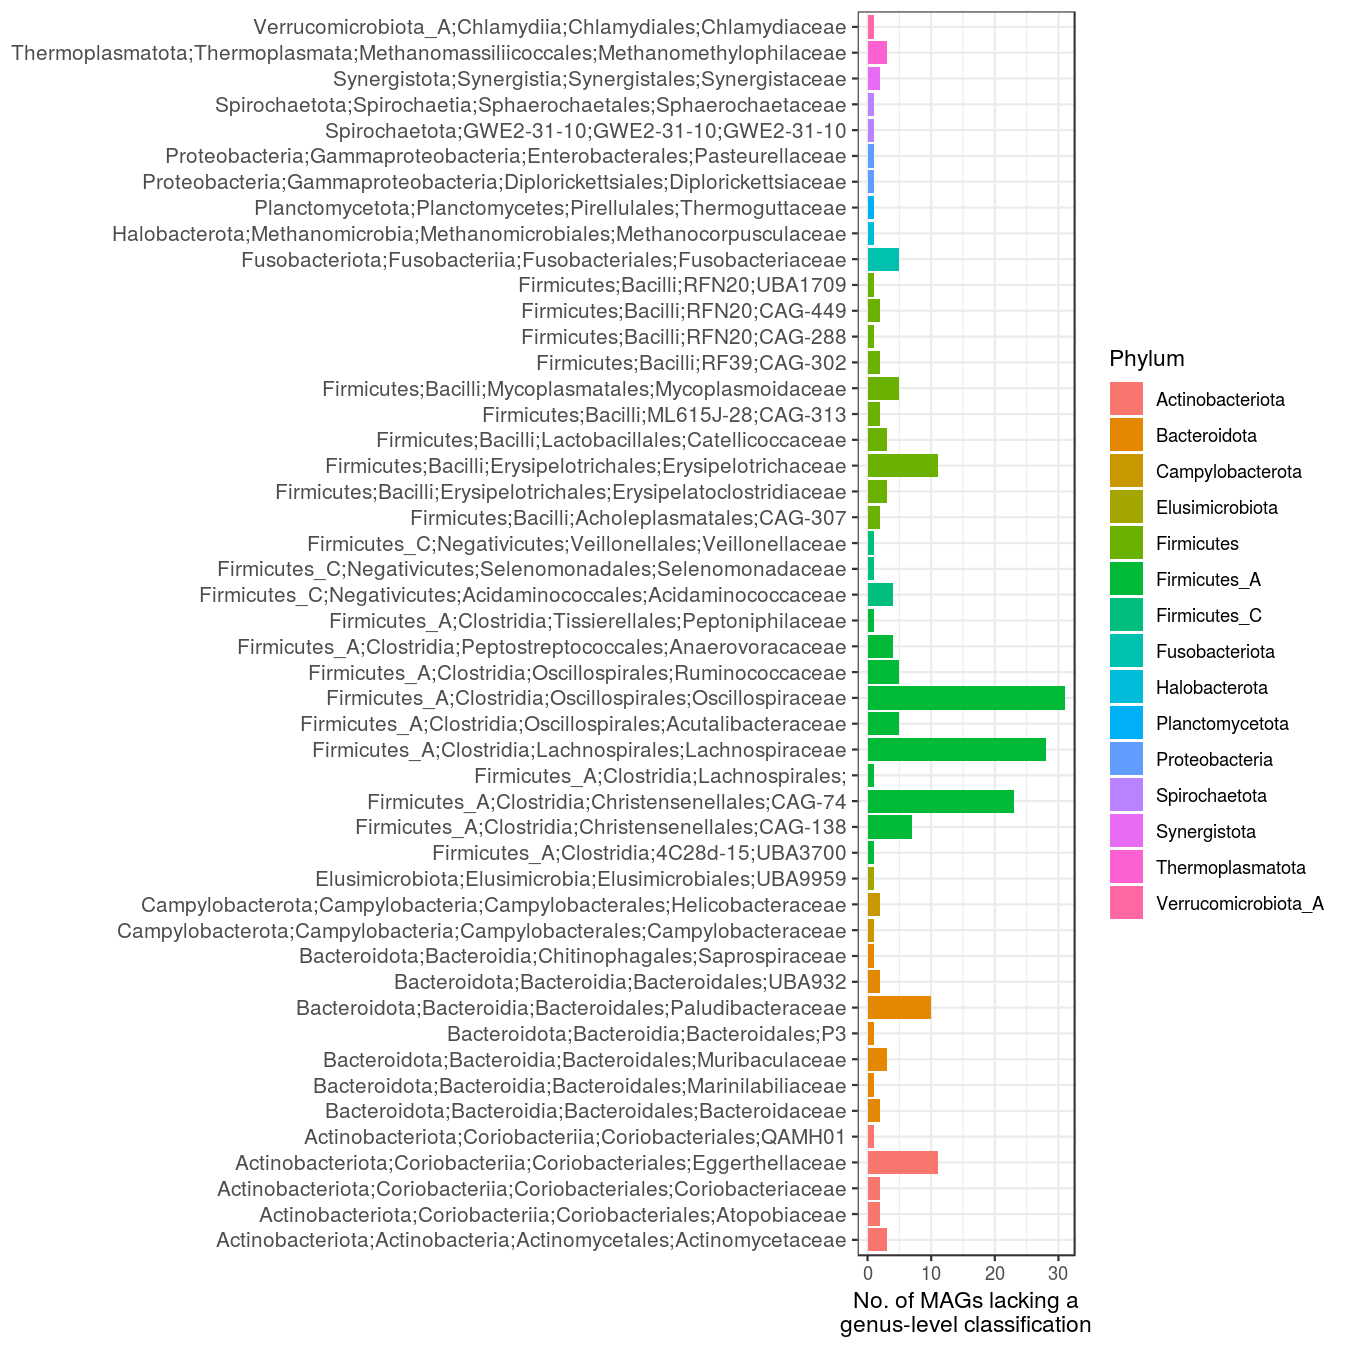

In [57]:
# lacking a genus-level classification
drep_j_s = drep_res_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a genus-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(9,9)
Plot(p)

# sessionInfo

In [58]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] bindrcpp_0.2.2          future.apply_1.0.0      future.batchtools_0.7.1
 [4] future_1.9.0            doParallel_1.0.11       iterators_1.0.10       
 [7] foreach_1.4.4           data.table_1.11.4       ggplot2_3.0.0          
[10] tidyr_0.8.1             dplyr_0.7.6            

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-2      progress_1.2.0    tidyselect_0.2.4  repr_0.15.0      
 [5] reshape2_1.4.3    purrr_0.2.4       listenv_0.7.0     colorspace_1.3-2 
 [9] htmltools_0.3.6   base64enc_0.1-3   r